In [5]:
# Try PNC first

import pickle
import numpy as np

pncdir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/PNC/'
pncdemo = pickle.load(open(f'{pncdir}/demographics.pkl', 'rb'))
pnctopdir = '/home/anton/Documents/Tulane/Research/Work/ContrastiveLearning/PNC/'

task = 'emoid'

fc = []
aps20 = []
aps15 = []
aps10 = []
aps5 = []
aps3 = []
aps1 = []
age = []
sex = []
race = []

for sub,a in pncdemo['age_at_cnb'].items():
    try:
        s = pncdemo['Sex'][sub]
        r = pncdemo['Race'][sub]
        if r not in ['AA', 'EA']:
            continue
        s = s == 'M'
        r = r == 'AA'
        fc.append(np.load(f'{pncdir}/fc/{sub}_task-{task}_fc.npy'))
        aps20.append(np.load(f'{pnctopdir}/Top20/{sub}_task-{task}top20_fc.npy'))
        aps15.append(np.load(f'{pnctopdir}/Top15/{sub}_task-{task}top15_fc.npy'))
        aps10.append(np.load(f'{pnctopdir}/Top10/{sub}_task-{task}top10_fc.npy'))
        aps5.append(np.load(f'{pnctopdir}/Top5/{sub}_task-{task}top5_fc.npy'))
        aps3.append(np.load(f'{pnctopdir}/Top3/{sub}_task-{task}top3_fc.npy'))
        aps1.append(np.load(f'{pnctopdir}/Top1/{sub}_task-{task}top1_fc.npy'))
        age.append(a)
        sex.append(s)
        race.append(r)
    except:
        pass

age = np.stack(age)
sex = np.stack(sex).astype('int')
race = np.stack(race).astype('int')
fc = np.stack(fc)
aps20 = np.stack(aps20)
aps15 = np.stack(aps15)
aps10 = np.stack(aps10)
aps5 = np.stack(aps5)
aps3 = np.stack(aps3)
aps1 = np.stack(aps1)

print([x.shape for x in [age, sex, race, fc, aps20, aps15, aps1]])

[(1329,), (1329,), (1329,), (1329, 34716), (1329, 34716), (1329, 34716), (1329, 34716)]


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LogisticRegression

def rmse(yhat, y):
    return np.mean((yhat-y)**2)**0.5

losses = []

for _ in range(5):
    xtr, xt, ytr, yt = train_test_split(fc-aps20, race, stratify=race, train_size=1000)

    # reg = Ridge(alpha=100).fit(xtr, ytr)
    # yhat = reg.predict(xt)
    # loss = rmse(yhat, yt)
    # null = rmse(np.mean(ytr), yt)
    # print(loss, null)
    # losses.append(loss)

    reg = LogisticRegression(C=1, max_iter=500).fit(xtr, ytr)
    yhat = reg.predict(xt)
    loss = np.mean(yhat == yt)
    null = np.mean(yt) # Not correct?
    if null < 0.5:
        null = 1-null
    print(loss, null)
    losses.append(loss)

print(np.mean(losses))

0.8449848024316109 0.5136778115501519
0.8267477203647416 0.5136778115501519
0.8145896656534954 0.5136778115501519
0.8358662613981763 0.5136778115501519
0.7963525835866262 0.5136778115501519
0.82370820668693


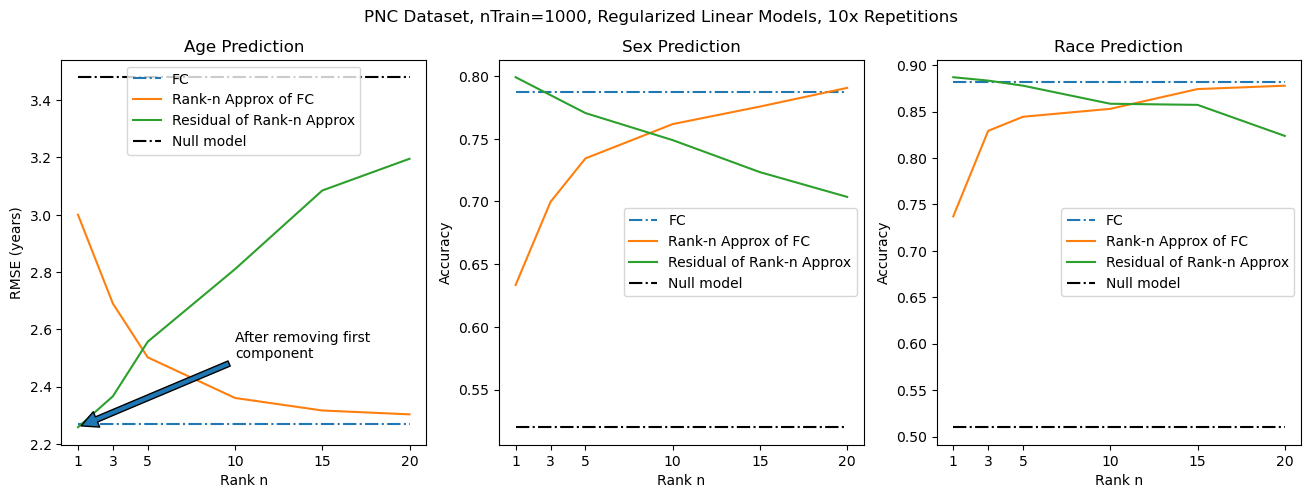

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(16,5))

ntrain = [1, 3, 5, 10, 15, 20]
ageaps = [3,2.69,2.502172146,2.360555768,2.316819955,2.303379707]
ageres = [2.258448942,2.366447604,2.557044601,2.810192284,3.084658462,3.195410124]
agefc = 2.27
agenull = 3.48

sexaps = [0.6334346505,0.6996960486,0.7343465046,0.7617021277,0.7756838906,0.7905775076]
sexres = [0.7990881459,0.7848024316,0.7705167173,0.7489361702,0.7234042553,0.7036474164]
sexfc = 0.7869300912
sexnull = 0.52

raceaps = [0.7370820669,0.8291793313,0.8443768997,0.852887538,0.8741641337,0.8778115502]
raceres = [0.8869300912,0.8832826748,0.8778115502,0.8583586626,0.8571428571,0.8237082067]
racefc = 0.8820668693
racenull = 0.51

ax[0].plot([1, 20], [agefc, agefc], label='FC', linestyle='-.')
ax[0].plot(ntrain, ageaps, label='Rank-n Approx of FC')
ax[0].plot(ntrain, ageres, label='Residual of Rank-n Approx')
ax[0].plot([1, 20], [agenull, agenull], label='Null model', color='black', linestyle='-.')
ax[0].set_xticks(ntrain)
ax[0].set_xlabel('Rank n')
ax[0].set_ylabel('RMSE (years)')
ax[0].set_title('Age Prediction')
ax[0].legend()

ax[1].plot([1, 20], [sexfc, sexfc], label='FC', linestyle='-.')
ax[1].plot(ntrain, sexaps, label='Rank-n Approx of FC')
ax[1].plot(ntrain, sexres, label='Residual of Rank-n Approx')
ax[1].plot([1, 20], [sexnull, sexnull], label='Null model', color='black', linestyle='-.')
ax[1].set_xticks(ntrain)
ax[1].set_xlabel('Rank n')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Sex Prediction')
ax[1].legend()

ax[2].plot([1, 20], [racefc, racefc], label='FC', linestyle='-.')
ax[2].plot(ntrain, raceaps, label='Rank-n Approx of FC')
ax[2].plot(ntrain, raceres, label='Residual of Rank-n Approx')
ax[2].plot([1, 20], [racenull, racenull], label='Null model', color='black', linestyle='-.')
ax[2].set_xticks(ntrain)
ax[2].set_xlabel('Rank n')
ax[2].set_ylabel('Accuracy')
ax[2].set_title('Race Prediction')
ax[2].legend()

ax[0].annotate('After removing first\ncomponent', xy=(1, ageres[0]), xytext=(10, 2.5),
             arrowprops=dict(shrink=0.02))

fig.suptitle('PNC Dataset, nTrain=1000, Regularized Linear Models, 10x Repetitions')
fig.show()
fig.savefig('/home/anton/Documents/Tulane/Research/Work/ContrastiveLearning/low-rank-vs-res-pnc.pdf')